In [12]:
#  Extract the Dataset
import zipfile
import os
import os
print(os.getcwd())


C:\Users\ABOR\Desktop\online dating predictions


In [2]:
# Define the path for the uploaded file
uploaded_file_path = '/mnt/data/Predict Online Dating Matches Dataset.zip'
extracted_folder_path = '/mnt/data/Predict_Online_Dating_Dataset/'

In [9]:
import zipfile

# Correctly formatted file path
zip_file_path = r'C:\Users\ABOR\Desktop\online dating predictions\Predict Online Dating Matches Dataset.zip'
extract_to_path = r'C:\Users\ABOR\Desktop\online dating predictions\extracted_files'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete!")




Extraction complete!


In [10]:
import pandas as pd
import os

# Define the extracted folder path and dataset file
extracted_folder_path = r'C:\Users\ABOR\Desktop\online dating predictions\extracted_files'
file_path = os.path.join(extracted_folder_path, 'Online_Dating_Behavior_Dataset.csv')

# Load the dataset
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB
   Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches
0       0             1   51777         3   47               5       70
1       1             0   36646         0   42               7      130
2       0             0   53801         1   25               5        0
3       0             0   56105         0   35               8        0
4       0             0   55597         1   36               6        0


           Gender  PurchasedVIP        Income     Children          Age  \
count  1000.00000   1000.000000   1000.000000  1000.000000  1000.000000   
mean      0.51000      0.474000  50988.447000     0.978000    34.616000   
std       0.50015      0.499573   9889.336141     0.997251     9.147799   
min       0.00000      0.000000  20786.000000     0.000000    18.000000   
25%       0.00000      0.000000  44358.500000     0.000000    27.000000   
50%       1.00000      0.000000  50841.500000     1.000000    35.000000   
75%       1.00000      1.000000  57396.000000     2.000000    43.000000   
max       1.00000      1.000000  81931.000000     3.000000    49.000000   

       Attractiveness     Matches  
count     1000.000000  1000.00000  
mean         5.624000    76.05000  
std          2.824288    52.71315  
min          1.000000     0.00000  
25%          3.000000     0.00000  
50%          6.000000    70.00000  
75%          8.000000   120.00000  
max         10.000000   160.00000  


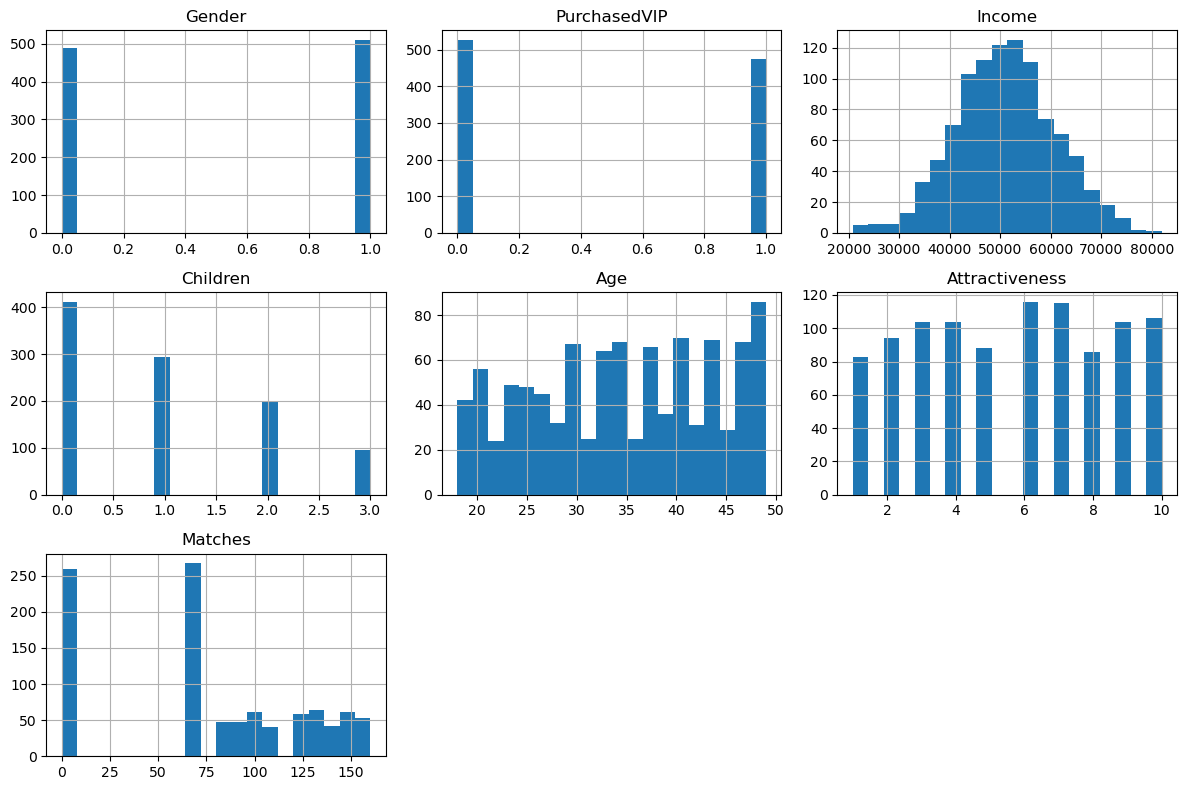

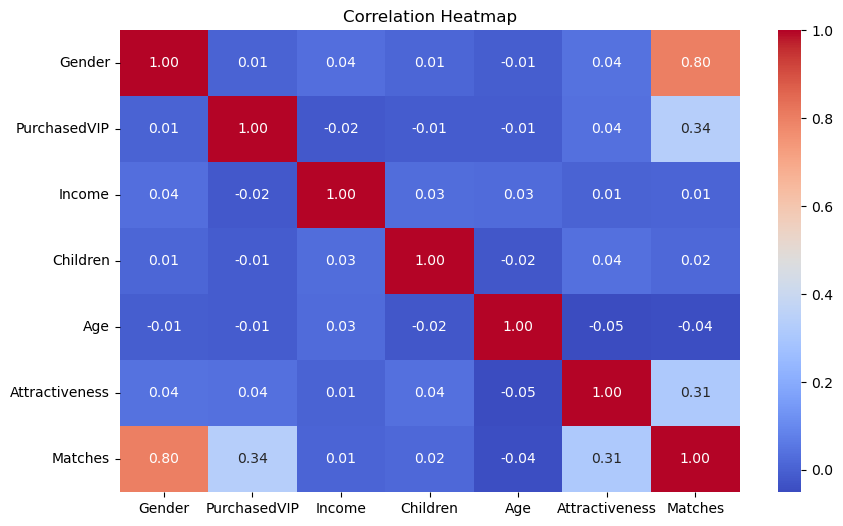

C:\Users\ABOR\AppData\Local\Temp\ipykernel_12020\2783750374.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Matches', palette='Set2')


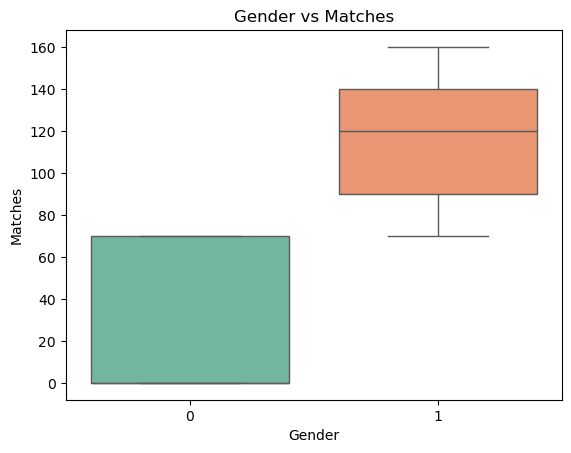

In [11]:

# Step 3: Perform Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# EDA: Distribution of numerical features
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# EDA: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# EDA: Gender vs Matches Boxplot
sns.boxplot(data=df, x='Gender', y='Matches', palette='Set2')
plt.title("Gender vs Matches")
plt.show()

Extraction complete!


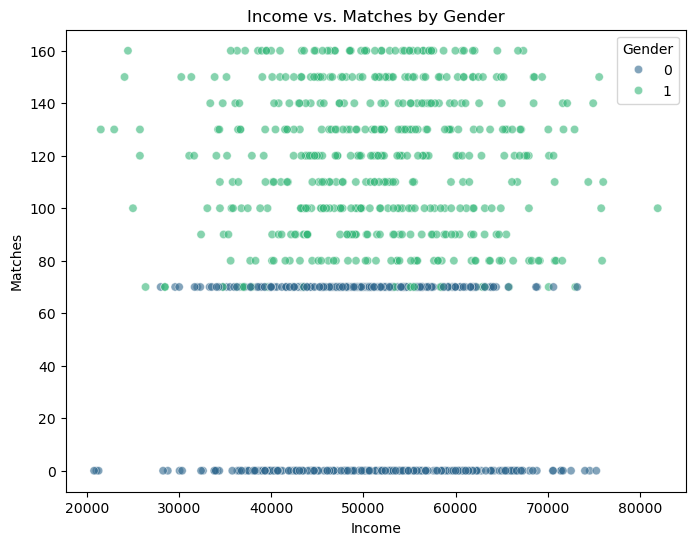

C:\Users\ABOR\AppData\Local\Temp\ipykernel_7220\171535768.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_matches = df.groupby('AgeGroup')['Matches'].mean()


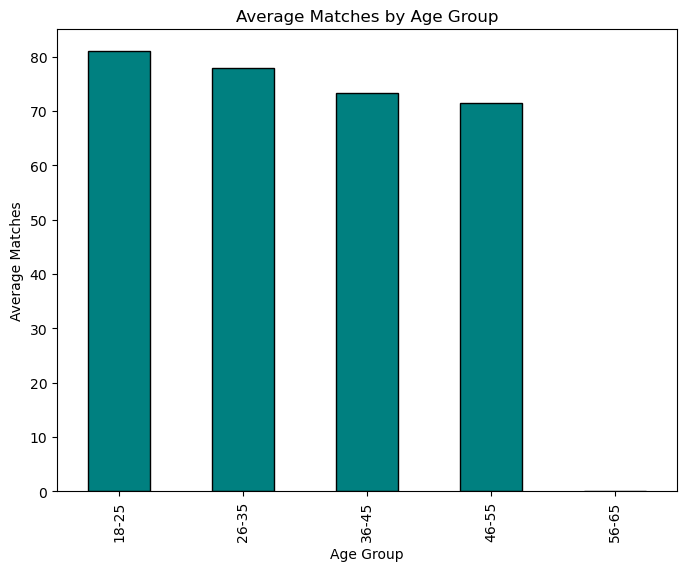

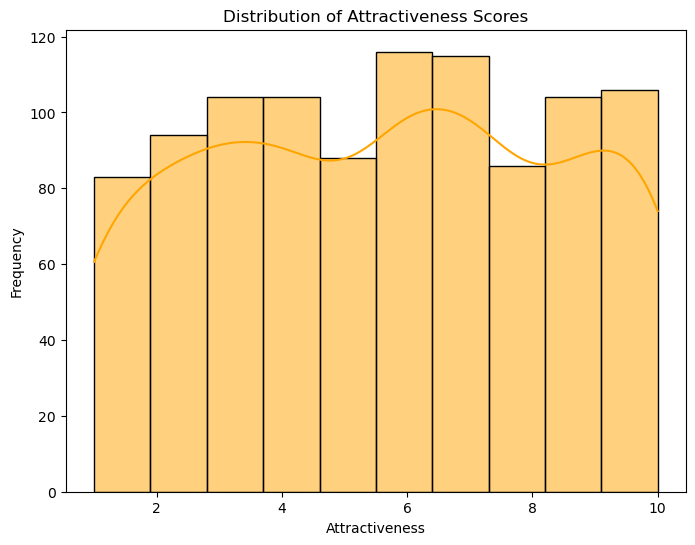

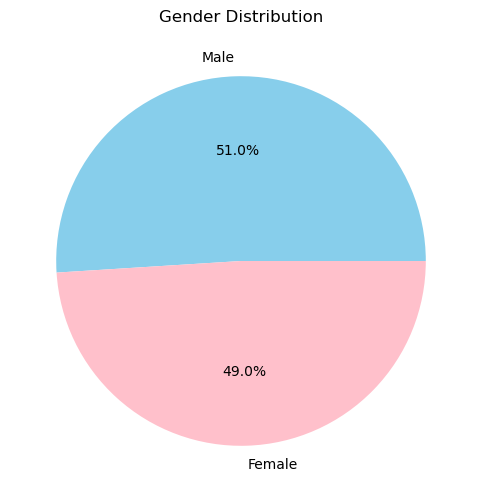

T-Statistic: 11.69
P-Value: 0.0000
We reject the null hypothesis: Purchasing VIP significantly impacts the number of matches.


In [3]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Step 1: Extract the ZIP file
zip_file_path = r'C:\Users\ABOR\Desktop\online dating predictions\Predict Online Dating Matches Dataset.zip'
extract_to_path = r'C:\Users\ABOR\Desktop\online dating predictions\extracted_files'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete!")

# Step 2: Load the dataset
file_path = os.path.join(extract_to_path, 'Online_Dating_Behavior_Dataset.csv')  # Adjust filename as needed
df = pd.read_csv(file_path)

# Step 3: Perform EDA
# 1. Income vs. Matches by Gender
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Matches', hue='Gender', alpha=0.6, palette='viridis')
plt.title("Income vs. Matches by Gender")
plt.xlabel("Income")
plt.ylabel("Matches")
plt.show()

# 2. Average Matches by Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=["18-25", "26-35", "36-45", "46-55", "56-65"])
age_group_matches = df.groupby('AgeGroup')['Matches'].mean()

plt.figure(figsize=(8, 6))
age_group_matches.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Average Matches by Age Group")
plt.ylabel("Average Matches")
plt.xlabel("Age Group")
plt.show()

# 3. Distribution of Attractiveness
plt.figure(figsize=(8, 6))
sns.histplot(df['Attractiveness'], kde=True, bins=10, color='orange')
plt.title("Distribution of Attractiveness Scores")
plt.xlabel("Attractiveness")
plt.ylabel("Frequency")
plt.show()

# 4. Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', labels=["Male", "Female"], colors=['skyblue', 'pink'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# Step 4: Hypothesis Testing
# Does purchasing VIP lead to more matches?
vip_yes = df[df['PurchasedVIP'] == 1]['Matches']
vip_no = df[df['PurchasedVIP'] == 0]['Matches']

t_stat, p_value = stats.ttest_ind(vip_yes, vip_no, equal_var=False)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("We reject the null hypothesis: Purchasing VIP significantly impacts the number of matches.")
else:
    print("We fail to reject the null hypothesis: Purchasing VIP does not significantly impact the number of matches.")


In [4]:
# Import necessary libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r'C:\Users\ABOR\Desktop\online dating predictions\extracted_files\Online_Dating_Behavior_Dataset.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Data preprocessing
# Handle missing values
df = df.dropna()  # Drop rows with missing values

# Convert categorical variables to numeric (e.g., Gender)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Assuming Male/Female values
df['PurchasedVIP'] = df['PurchasedVIP'].astype(int)

# Define features (X) and target (y)
X = df[['Age', 'Income', 'Gender', 'PurchasedVIP', 'Attractiveness']]  # Features
y = df['Matches']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)


Mean Squared Error: 2623.07
R-squared: 0.04
Feature Importance:
Income            0.418636
Age               0.252919
Attractiveness    0.207023
PurchasedVIP      0.121422
Gender            0.000000
dtype: float64


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

# Load the dataset
file_path = r'C:\Users\ABOR\Desktop\online dating predictions\extracted_files\Online_Dating_Behavior_Dataset.csv'  # Update path as needed
df = pd.read_csv(file_path)

# Data Preprocessing
df = df.dropna()  # Remove rows with missing values

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Male = 0, Female = 1

# Task 1: Predict VIP Purchases
print("\n--- TASK 1: Predict VIP Purchases ---")
X_vip = df[['Age', 'Income', 'Gender', 'Attractiveness', 'Matches']]  # Features
y_vip = df['PurchasedVIP']  # Target
X_train_vip, X_test_vip, y_train_vip, y_test_vip = train_test_split(X_vip, y_vip, test_size=0.2, random_state=42)

vip_model = RandomForestClassifier(random_state=42)
vip_model.fit(X_train_vip, y_train_vip)
y_pred_vip = vip_model.predict(X_test_vip)

print("Accuracy:", accuracy_score(y_test_vip, y_pred_vip))
print(classification_report(y_test_vip, y_pred_vip))

# Task 2: Predict Dating Success (High Matches)
print("\n--- TASK 2: Predict Dating Success ---")
df['HighMatches'] = (df['Matches'] > df['Matches'].median()).astype(int)  # Binary classification (High/Low matches)
X_matches = df[['Age', 'Income', 'Gender', 'Attractiveness', 'PurchasedVIP']]
y_matches = df['HighMatches']
X_train_matches, X_test_matches, y_train_matches, y_test_matches = train_test_split(X_matches, y_matches, test_size=0.2, random_state=42)

matches_model = RandomForestClassifier(random_state=42)
matches_model.fit(X_train_matches, y_train_matches)
y_pred_matches = matches_model.predict(X_test_matches)

print("Accuracy:", accuracy_score(y_test_matches, y_pred_matches))
print(classification_report(y_test_matches, y_pred_matches))

# Task 3: Predict Compatibility (Matching Scores)
print("\n--- TASK 3: Predict Compatibility ---")
# Example: Matching score as a random number (simulate compatibility between random users)
df['MatchingScore'] = np.random.uniform(0, 100, df.shape[0])  # Example feature
X_compat = df[['Age', 'Income', 'Gender', 'Attractiveness', 'PurchasedVIP']]
y_compat = df['MatchingScore']
X_train_compat, X_test_compat, y_train_compat, y_test_compat = train_test_split(X_compat, y_compat, test_size=0.2, random_state=42)

compat_model = RandomForestRegressor(random_state=42)
compat_model.fit(X_train_compat, y_train_compat)
y_pred_compat = compat_model.predict(X_test_compat)

print("Mean Squared Error:", mean_squared_error(y_test_compat, y_pred_compat))
print("R-squared:", r2_score(y_test_compat, y_pred_compat))

# Task 4: Predict Attractiveness Scores
print("\n--- TASK 4: Predict Attractiveness Scores ---")
X_attract = df[['Age', 'Income', 'Gender', 'PurchasedVIP', 'Matches']]
y_attract = df['Attractiveness']
X_train_attract, X_test_attract, y_train_attract, y_test_attract = train_test_split(X_attract, y_attract, test_size=0.2, random_state=42)

attract_model = RandomForestRegressor(random_state=42)
attract_model.fit(X_train_attract, y_train_attract)
y_pred_attract = attract_model.predict(X_test_attract)

print("Mean Squared Error:", mean_squared_error(y_test_attract, y_pred_attract))
print("R-squared:", r2_score(y_test_attract, y_pred_attract))

# Summary of Results
print("\n--- Summary ---")
print("VIP Purchase Prediction Accuracy:", accuracy_score(y_test_vip, y_pred_vip))
print("Dating Success Prediction Accuracy:", accuracy_score(y_test_matches, y_pred_matches))
print("Compatibility Prediction R-squared:", r2_score(y_test_compat, y_pred_compat))
print("Attractiveness Prediction R-squared:", r2_score(y_test_attract, y_pred_attract))



--- TASK 1: Predict VIP Purchases ---
Accuracy: 0.705
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       106
           1       0.68      0.69      0.69        94

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.71      0.70      0.71       200


--- TASK 2: Predict Dating Success ---
Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       105
           1       0.53      0.48      0.51        95

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200


--- TASK 3: Predict Compatibility ---
Mean Squared Error: 915.1820997157005
R-squared: -0.14619939214878697

--- TASK 4: Predict Attractiveness Scores ---
Mean Squared Error: 4.9582605
R-squared: 0.3988511725605377

--- Summary ---
VIP